In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import random

In [2]:
#swap out holdout set for test set depending on what is being cleaned
train = pd.read_csv("train.csv")
test = pd.read_csv("holdout.csv")

In [3]:
num_cols = ['ORIG_POL_YR', 'YEARS_WITH_HIG', 'MIN_COLL_DED',
            'MIN_COMP_DED', 'MAX_COLL_DED', 'MAX_COMP_DED']
cat_cols = ['GARAGE_LOC_ZIP_CD', 'POL_NEW_RNW_CD', 'POL_COV_PKG_CD',
            'POL_BI_PER_PERS_LMT_CD', 'POL_BI_PER_PERS_OCCUR_LMT_CD', 
            'POL_PD_LMT_CD', 'STATE_ABBR', 'ACCT_CR_IND', 'YOUTHFUL_IND']

# Create a new DataFrame for the cleaned dataset
train_clean_1 = train.copy()
test_clean_1 = test.copy()

In [4]:
train_clean_1.drop(columns=['MKTG_MEDIA_DESC', 'MEDIA_GROUP_CD_DESC'], inplace=True)
test_clean_1.drop(columns=['MKTG_MEDIA_DESC', 'MEDIA_GROUP_CD_DESC'], inplace=True)

In [5]:
# For numerical columns: Median is less sensitive to outliers compared to mean
num_imputer = SimpleImputer(strategy='median')

In [6]:
# For categorical columns: Most frequent value is chosen to maintain the mode
cat_imputer = SimpleImputer(strategy='most_frequent')

In [7]:
#REMOVING THE 9999 value from YEARS_WITH_HIG and replacing with the difference between ORIG_POL_YR and POL_YR
train_clean_1['POL_YR_YEAR'] = train_clean_1['POL_YR'].str[:4].astype(int)
year_diff = train_clean_1['ORIG_POL_YR'] - train_clean_1['POL_YR_YEAR']
mask = train_clean_1['YEARS_WITH_HIG'] == 9999
train_clean_1.loc[mask, 'YEARS_WITH_HIG'] = year_diff[mask]
train_clean_1['POL_YR_YEAR'] = train_clean_1['POL_YR'].str[:4]
train_clean_1['POL_YR_MON'] = train_clean_1['POL_YR'].str[5:]
train_clean_1['POL_YR'] = (train_clean_1['POL_YR_YEAR']+train_clean_1['POL_YR_MON']).astype(int)
train_clean_1.drop(columns=['POL_YR_YEAR', 'POL_YR_MON'], inplace=True)

In [8]:
#REMOVING THE 9999 value from YEARS_WITH_HIG and replacing with the difference between ORIG_POL_YR and POL_YR
test_clean_1['POL_YR_YEAR'] = test_clean_1['POL_YR'].str[:4].astype(int)
year_diff = test_clean_1['ORIG_POL_YR'] - test_clean_1['POL_YR_YEAR']
mask = test_clean_1['YEARS_WITH_HIG'] == 9999
test_clean_1.loc[mask, 'YEARS_WITH_HIG'] = year_diff[mask]
test_clean_1['POL_YR_YEAR'] = test_clean_1['POL_YR'].str[:4]
test_clean_1['POL_YR_MON'] = test_clean_1['POL_YR'].str[5:]
test_clean_1['POL_YR'] = (test_clean_1['POL_YR_YEAR']+test_clean_1['POL_YR_MON']).astype(int)
test_clean_1.drop(columns=['POL_YR_YEAR', 'POL_YR_MON'], inplace=True)

In [9]:
# Apply numerical imputer
train_clean_1[num_cols] = num_imputer.fit_transform(train_clean_1[num_cols])
test_clean_1[num_cols] = num_imputer.fit_transform(test_clean_1[num_cols])

# Apply categorical imputer
train_clean_1[cat_cols] = cat_imputer.fit_transform(train_clean_1[cat_cols])
test_clean_1[cat_cols] = cat_imputer.fit_transform(test_clean_1[cat_cols])

In [10]:
varb =  ['NEW_VEH_MODEL_YR',
        'TELEMATICS_IND_CNT',
        'TLMTC_POL_BUCKET_CD',
        'POL_FORM_CD_VALID',
        'HOME_IND',
        'ACTL_DRVR_CNT',
        'PPV_CNT',
        'MULTI_SINGLE_VEH_POL_CD',
        'HH_COMP',
        'PUP_IND',
        'EXCL_NM_DRVR_CNT',
        'POL_MAX_DRVR_AGE',
        'POL_MIN_DRVR_AGE',
        'ADV_QTE_DAY_CNT',
        'ADV_QT_CR_APP_IND',
        'BILL_PYMENT_FREQ_DESC',
        'FULL_PAY_DISCOUNT_IND',
        'BILL_PYMNT_METH_DESC']

In [11]:
train_clean_1['ADV_QT_CR_APP_IND'].value_counts()

N    214491
Y     44132
        229
Name: ADV_QT_CR_APP_IND, dtype: int64

In [12]:
train_clean_1['ADV_QT_CR_APP_IND'] = train_clean_1['ADV_QT_CR_APP_IND'].replace(' ', 'N')
test_clean_1['ADV_QT_CR_APP_IND'] = test_clean_1['ADV_QT_CR_APP_IND'].replace(' ', 'N')

In [13]:
train_clean_1['POL_NEW_RNW_CD'].value_counts()

R    243732
N     21001
        229
Name: POL_NEW_RNW_CD, dtype: int64

In [14]:
train_clean_1['POL_NEW_RNW_CD'] = train_clean_1['POL_NEW_RNW_CD'].replace(' ', 'R')
test_clean_1['POL_NEW_RNW_CD'] = test_clean_1['POL_NEW_RNW_CD'].replace(' ', 'R')

In [15]:
include_num = train_clean_1[varb].select_dtypes(include=['float64'])
in_num_col = list(include_num.columns)
include_cat =  train_clean_1[varb].select_dtypes(include=['object'])
in_cat_col = list(include_cat.columns)

In [16]:
train_clean_1[in_num_col] = num_imputer.fit_transform(train_clean_1[in_num_col])
test_clean_1[in_num_col] = num_imputer.fit_transform(test_clean_1[in_num_col])

In [17]:
train_clean_1[in_cat_col] = cat_imputer.fit_transform(train_clean_1[in_cat_col])
test_clean_1[in_cat_col] = cat_imputer.fit_transform(test_clean_1[in_cat_col])

In [18]:
def random_sampling_imputation(data, variable_name):
    # Get the indices of the missing values
    missing_indices = data[variable_name].isna()
    
    # Get the non-missing values
    non_missing_values = data[variable_name].dropna().values
    
    # Randomly sample values for imputation
    imputed_values = np.random.choice(non_missing_values, size=missing_indices.sum(), replace=True)
    
    # Replace the missing values with the imputed values
    data.loc[missing_indices, variable_name] = imputed_values
    
    return data

In [19]:
train_clean_1['MARKET_CHANNEL'] = train_clean_1['MARKET_CHANNEL'].replace(np.nan, 'MCNS')
market_channel_levels_after_replace = train_clean_1['MARKET_CHANNEL'].unique()
test_clean_1['MARKET_CHANNEL'] = test_clean_1['MARKET_CHANNEL'].replace(np.nan, 'MCNS')

In [20]:
train_clean_1.replace({
    
    'MARKET_CHANNEL': {'QTI': 1, 'Comp Rater': 2, 'Ez Lynx': 3, 'MCNS': 4}
}, inplace=True)

test_clean_1.replace({
    
    'MARKET_CHANNEL': {'QTI': 1, 'Comp Rater': 2, 'Ez Lynx': 3, 'MCNS': 4}
}, inplace=True)

In [21]:
train_clean_1['MKT_INDX_CTGY_CD'] = train_clean_1['MKT_INDX_CTGY_CD'].replace(np.nan, 'MK_INDNS')
train_clean_1['MKT_INDX_CTGY_CD'] = train_clean_1['MKT_INDX_CTGY_CD'].str.strip().replace('', 'MK_INDNS')
train_clean_1.replace({  'MKT_INDX_CTGY_CD': {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5,'MK_INDNS': 6 }}, inplace=True)
test_clean_1['MKT_INDX_CTGY_CD'] = test_clean_1['MKT_INDX_CTGY_CD'].replace(np.nan, 'MK_INDNS')
test_clean_1['MKT_INDX_CTGY_CD'] = test_clean_1['MKT_INDX_CTGY_CD'].str.strip().replace('', 'MK_INDNS')
test_clean_1.replace({  'MKT_INDX_CTGY_CD': {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5,'MK_INDNS': 6 }}, inplace=True)

In [22]:
train_clean_1['INTERNET_CR_APPL_IND'].fillna("INTDNS", inplace=True)
train_clean_1.replace({
    'INTERNET_CR_APPL_IND': {'N': 1, 'INTDNS': 2}
}, inplace=True)

train_clean_1['INTERNET_CR_APPL_IND'].unique()
test_clean_1['INTERNET_CR_APPL_IND'].fillna("INTDNS", inplace=True)
test_clean_1.replace({
    'INTERNET_CR_APPL_IND': {'N': 1, 'INTDNS': 2}
}, inplace=True)


In [23]:
train_clean_1['AVG_VEHICLE_MILEAGE'] = train_clean_1['AVG_VEHICLE_MILEAGE'].replace(0, 12.5)
train_clean_1['AVG_VEHICLE_MILEAGE'] = pd.to_numeric(train_clean_1['AVG_VEHICLE_MILEAGE'], errors='coerce')
mean_mileage = train_clean_1['AVG_VEHICLE_MILEAGE'].mean(skipna=True)
train_clean_1['AVG_VEHICLE_MILEAGE'].fillna(mean_mileage, inplace=True)

test_clean_1['AVG_VEHICLE_MILEAGE'] = test_clean_1['AVG_VEHICLE_MILEAGE'].replace(0, 12.5)
test_clean_1['AVG_VEHICLE_MILEAGE'] = pd.to_numeric(test_clean_1['AVG_VEHICLE_MILEAGE'], errors='coerce')
mean_mileage_test = test_clean_1['AVG_VEHICLE_MILEAGE'].mean(skipna=True)
test_clean_1['AVG_VEHICLE_MILEAGE'].fillna(mean_mileage_test, inplace=True)

In [24]:
train_clean_1 = random_sampling_imputation(train_clean_1, 'HTFD_POL_YR_CNT')
test_clean_1 = random_sampling_imputation(test_clean_1, 'HTFD_POL_YR_CNT')

In [25]:
train_clean_1['QUALITY_PERSONA'] = train_clean_1['QUALITY_PERSONA'].replace(np.nan, 'QPNS')
train_clean_1.replace({
    'QUALITY_PERSONA': {'Q01': 1, 'Q02': 2, 'Q03': 3, 'Q04': 4, 'Q05': 5, 
                             'Q06': 6, 'Q07': 7, 'Q08': 8, 'Q09': 9, 'Q10': 10, 'QPNS': 11}
}, inplace=True)

test_clean_1['QUALITY_PERSONA'] = test_clean_1['QUALITY_PERSONA'].replace(np.nan, 'QPNS')
test_clean_1.replace({
    'QUALITY_PERSONA': {'Q01': 1, 'Q02': 2, 'Q03': 3, 'Q04': 4, 'Q05': 5, 
                             'Q06': 6, 'Q07': 7, 'Q08': 8, 'Q09': 9, 'Q10': 10, 'QPNS': 11}
}, inplace=True)

In [26]:
train_clean_1['MAX_BI_RTNG_SYM_CD'].replace('    ', np.nan, inplace=True)
test_clean_1['MAX_BI_RTNG_SYM_CD'].replace('    ', np.nan, inplace=True)

In [27]:
random.seed(123)

# Get non-missing values from MAX_BI_RTNG_SYM_CD
non_missing_values = train_clean_1['MAX_BI_RTNG_SYM_CD'].dropna().tolist()

# Impute missing values with random sampling
missing_indices = train_clean_1[train_clean_1['MAX_BI_RTNG_SYM_CD'].isna()].index
train_clean_1.loc[missing_indices, 'MAX_BI_RTNG_SYM_CD'] = random.choices(non_missing_values, k=len(missing_indices))

In [28]:
random.seed(123)

# Get non-missing values from MAX_BI_RTNG_SYM_CD
non_missing_values = test_clean_1['MAX_BI_RTNG_SYM_CD'].dropna().tolist()

# Impute missing values with random sampling
missing_indices = test_clean_1[test_clean_1['MAX_BI_RTNG_SYM_CD'].isna()].index
test_clean_1.loc[missing_indices, 'MAX_BI_RTNG_SYM_CD'] = random.choices(non_missing_values, k=len(missing_indices))

In [29]:
train_clean_1['MAX_COMP_RTNG_SYM_CD'].replace('    ', np.nan, inplace=True)
test_clean_1['MAX_COMP_RTNG_SYM_CD'].replace('    ', np.nan, inplace=True)

In [30]:
random.seed(123)

# Get non-missing values from MAX_COMP_RTNG_SYM_CD
non_missing_values = train_clean_1['MAX_COMP_RTNG_SYM_CD'].dropna().tolist()

# Impute missing values with random sampling
missing_indices = train_clean_1[train_clean_1['MAX_COMP_RTNG_SYM_CD'].isna()].index
train_clean_1.loc[missing_indices, 'MAX_COMP_RTNG_SYM_CD'] = random.choices(non_missing_values, k=len(missing_indices))

In [31]:
random.seed(123)

# Get non-missing values from MAX_COMP_RTNG_SYM_CD
non_missing_values = test_clean_1['MAX_COMP_RTNG_SYM_CD'].dropna().tolist()

# Impute missing values with random sampling
missing_indices = test_clean_1[test_clean_1['MAX_COMP_RTNG_SYM_CD'].isna()].index
test_clean_1.loc[missing_indices, 'MAX_COMP_RTNG_SYM_CD'] = random.choices(non_missing_values, k=len(missing_indices))

In [32]:
train_clean_1['RENEWAL_PREMIUM_CHANGE'].fillna(0, inplace=True)
test_clean_1['RENEWAL_PREMIUM_CHANGE'].fillna(0, inplace=True)

In [33]:
train_clean_1['RENEWAL_PREMIUM_CHANGE_TWO_TERM'].fillna(0, inplace=True)
test_clean_1['RENEWAL_PREMIUM_CHANGE_TWO_TERM'].fillna(0, inplace=True)

In [34]:
train_clean_1['INSURED_AGE'] = pd.to_numeric(train_clean_1['INSURED_AGE'], errors='coerce')
# Replace missing values in the INSURED_AGE column with random sampling
train_clean_1 = round(random_sampling_imputation(train_clean_1, "INSURED_AGE"), 0)

In [35]:
test_clean_1['INSURED_AGE'] = pd.to_numeric(test_clean_1['INSURED_AGE'], errors='coerce')
# Replace missing values in the INSURED_AGE column with random sampling
test_clean_1 = round(random_sampling_imputation(test_clean_1, "INSURED_AGE"), 0)

In [36]:
#replacing all YES with 1 and NO with 0
train_clean_1['YOUTHFUL_IND'].replace('N', 0, inplace=True)
train_clean_1['YOUTHFUL_IND'].replace('Y', 1, inplace=True)
train_clean_1['HOME_IND'].replace('N', 0, inplace=True)
train_clean_1['HOME_IND'].replace('Y', 1, inplace=True) 
train_clean_1['PUP_IND'].replace('N', 0, inplace=True)
train_clean_1['PUP_IND'].replace('Y', 1, inplace=True) 
train_clean_1['FULL_PAY_DISCOUNT_IND'].replace('N', 0, inplace=True)
train_clean_1['FULL_PAY_DISCOUNT_IND'].replace('Y', 1, inplace=True) 
train_clean_1['LIAB_ONLY_IND'].replace('N', 0, inplace=True)
train_clean_1['LIAB_ONLY_IND'].replace('Y', 1, inplace=True)
train_clean_1['ADV_QT_CR_APP_IND'].replace('N', 0, inplace=True)
train_clean_1['ADV_QT_CR_APP_IND'].replace('Y', 1, inplace=True)

In [37]:
#replacing all YES with 1 and NO with 0
test_clean_1['YOUTHFUL_IND'].replace('N', 0, inplace=True)
test_clean_1['YOUTHFUL_IND'].replace('Y', 1, inplace=True)
test_clean_1['HOME_IND'].replace('N', 0, inplace=True)
test_clean_1['HOME_IND'].replace('Y', 1, inplace=True) 
test_clean_1['PUP_IND'].replace('N', 0, inplace=True)
test_clean_1['PUP_IND'].replace('Y', 1, inplace=True) 
test_clean_1['FULL_PAY_DISCOUNT_IND'].replace('N', 0, inplace=True)
test_clean_1['FULL_PAY_DISCOUNT_IND'].replace('Y', 1, inplace=True) 
test_clean_1['LIAB_ONLY_IND'].replace('N', 0, inplace=True)
test_clean_1['LIAB_ONLY_IND'].replace('Y', 1, inplace=True)
test_clean_1['ADV_QT_CR_APP_IND'].replace('N', 0, inplace=True)
test_clean_1['ADV_QT_CR_APP_IND'].replace('Y', 1, inplace=True)

In [38]:
# replacing RENEWAL with 0 and NEW with 1
train_clean_1['POL_NEW_RNW_CD'].replace('R', 0, inplace=True)
train_clean_1['POL_NEW_RNW_CD'].replace('N', 1, inplace=True)
train_clean_1['POL_NEW_RNW_CD'] = train_clean_1['POL_NEW_RNW_CD'].astype(int)

In [39]:
# replacing RENEWAL with 0 and NEW with 1
test_clean_1['POL_NEW_RNW_CD'].replace('R', 0, inplace=True)
test_clean_1['POL_NEW_RNW_CD'].replace('N', 1, inplace=True)
test_clean_1['POL_NEW_RNW_CD'] = test_clean_1['POL_NEW_RNW_CD'].astype(int)

In [40]:
# Turning MULTI_SINGLE_VEH_POL_CD into numerical by replacing Single with 0 and Multi with 1
train_clean_1['MULTI_SINGLE_VEH_POL_CD'].replace('S', 0, inplace=True)
train_clean_1['MULTI_SINGLE_VEH_POL_CD'].replace('M', 1, inplace=True) 
# Turning MULTI_SINGLE_VEH_POL_CD into numerical by replacing Single with 0 and Multi with 1
test_clean_1['MULTI_SINGLE_VEH_POL_CD'].replace('S', 0, inplace=True)
test_clean_1['MULTI_SINGLE_VEH_POL_CD'].replace('M', 1, inplace=True) 

In [41]:
#change the states to numbers in alphabetical order 0 to 50
state_names = sorted(list(train_clean_1['STATE_ABBR'].unique()))
state_code_to_number = {state: i for i, state in enumerate(state_names)}
train_clean_1['STATE_ABBR'] = train_clean_1['STATE_ABBR'].replace(state_code_to_number)
test_clean_1['STATE_ABBR'] = test_clean_1['STATE_ABBR'].replace(state_code_to_number)

In [42]:
state_code_to_number

{'AL': 0,
 'AR': 1,
 'AZ': 2,
 'CA': 3,
 'CO': 4,
 'CT': 5,
 'DC': 6,
 'DE': 7,
 'FL': 8,
 'GA': 9,
 'IA': 10,
 'ID': 11,
 'IL': 12,
 'IN': 13,
 'KS': 14,
 'KY': 15,
 'LA': 16,
 'MD': 17,
 'ME': 18,
 'MN': 19,
 'MO': 20,
 'MT': 21,
 'NC': 22,
 'ND': 23,
 'NE': 24,
 'NH': 25,
 'NM': 26,
 'NV': 27,
 'NY': 28,
 'OH': 29,
 'OK': 30,
 'OR': 31,
 'PA': 32,
 'RI': 33,
 'SC': 34,
 'SD': 35,
 'TN': 36,
 'TX': 37,
 'UT': 38,
 'VA': 39,
 'VT': 40,
 'WA': 41,
 'WI': 42,
 'WV': 43,
 'WY': 44}

In [43]:
cov_values = sorted(list(train_clean_1['POL_COV_PKG_CD'].unique()))
cov_dict = {value: i for i, value in enumerate(cov_values)}
train_clean_1['POL_COV_PKG_CD'] = train_clean_1['POL_COV_PKG_CD'].replace(cov_dict)
cov_dict

{'FULL': 0,
 'LIAB ONLY': 1,
 'LIAB/COMP': 2,
 'MIXED COV': 3,
 'NO COV': 4,
 'PHYSD ONLY': 5}

In [44]:
test_clean_1['POL_COV_PKG_CD'] = test_clean_1['POL_COV_PKG_CD'].replace(cov_dict)

In [45]:
TLM_PD_values = sorted(list(train_clean_1['TLMTC_POL_BUCKET_CD'].unique()))
TLM_PD_dict = {value: i for i, value in enumerate(TLM_PD_values)}
train_clean_1['TLMTC_POL_BUCKET_CD'] = train_clean_1['TLMTC_POL_BUCKET_CD'].replace(TLM_PD_dict)
TLM_PD_dict

{'Issued with TrueLane but Never Activated': 0, 'Non-Telematics': 1}

In [46]:
test_clean_1['TLMTC_POL_BUCKET_CD'] = test_clean_1['TLMTC_POL_BUCKET_CD'].replace(TLM_PD_dict)

In [47]:
POL_FORM_values = sorted(list(train_clean_1['POL_FORM_CD_VALID'].unique()))
POL_FORM_dict = {value: i for i, value in enumerate(POL_FORM_values)}
train_clean_1['POL_FORM_CD_VALID'] = train_clean_1['POL_FORM_CD_VALID'].replace(POL_FORM_dict)
POL_FORM_dict

{'HO2': 0, 'HO3': 1, 'HO4': 2, 'HO5': 3, 'HO6': 4, 'HO7': 5}

In [48]:
test_clean_1['POL_FORM_CD_VALID'] = test_clean_1['POL_FORM_CD_VALID'].replace(POL_FORM_dict)

In [49]:
HH_COMP_values = sorted(list(train_clean_1['HH_COMP'].unique()))
HH_COMP_dict = {value: i for i, value in enumerate(HH_COMP_values)}
train_clean_1['HH_COMP'] = train_clean_1['HH_COMP'].replace(HH_COMP_dict)
HH_COMP_dict

{'0 CARS': 0,
 '0 DRVS': 1,
 'MC C=D': 2,
 'MCMCTD': 3,
 'MCMDTC': 4,
 'SC1D': 5,
 'SCMT1D': 6}

In [50]:
test_clean_1['HH_COMP'] = test_clean_1['HH_COMP'].replace(HH_COMP_dict)

In [51]:
BILL_FREQ_values = sorted(list(train_clean_1['BILL_PYMENT_FREQ_DESC'].unique()))
BILL_FREQ_dict = {value: i for i, value in enumerate(BILL_FREQ_values)}
train_clean_1['BILL_PYMENT_FREQ_DESC'] = train_clean_1['BILL_PYMENT_FREQ_DESC'].replace(BILL_FREQ_dict)
BILL_FREQ_dict

{'Eight Payments': 0,
 'Full Payment': 1,
 'Monthly Payments': 2,
 'Quarterly Payments': 3,
 'Semi Annual Payments': 4,
 'Six Payments': 5,
 'Three Payments': 6,
 'Two Payments': 7}

In [52]:
test_clean_1['BILL_PYMENT_FREQ_DESC'] = test_clean_1['BILL_PYMENT_FREQ_DESC'].replace(BILL_FREQ_dict)

In [53]:
BILL_METH_values = sorted(list(train_clean_1['BILL_PYMNT_METH_DESC'].unique()))
BILL_METH_dict = {value: i for i, value in enumerate(BILL_METH_values)}
train_clean_1['BILL_PYMNT_METH_DESC'] = train_clean_1['BILL_PYMNT_METH_DESC'].replace(BILL_METH_dict)
BILL_METH_dict

{'Cash': 0, 'Payroll Agent': 1}

In [54]:
test_clean_1['BILL_PYMNT_METH_DESC'] = test_clean_1['BILL_PYMNT_METH_DESC'].replace(BILL_METH_dict)

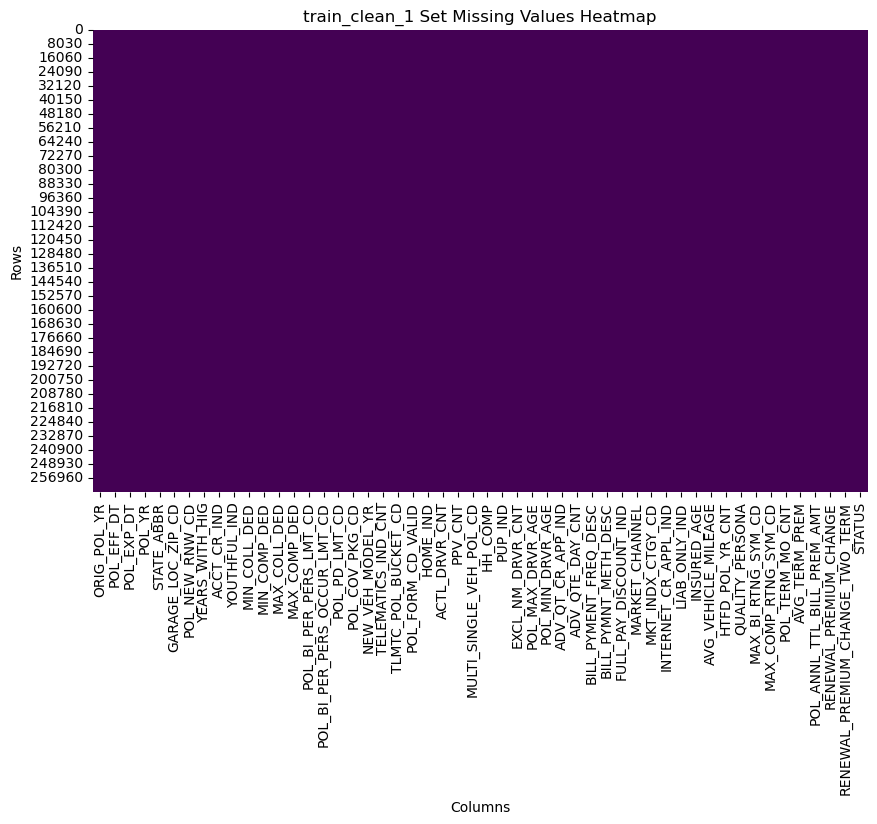

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
missing_train_clean_1 = train_clean_1.isnull()
plt.figure(figsize=(10, 6))
sns.heatmap(missing_train_clean_1, cmap='viridis', cbar=False)
plt.title('train_clean_1 Set Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

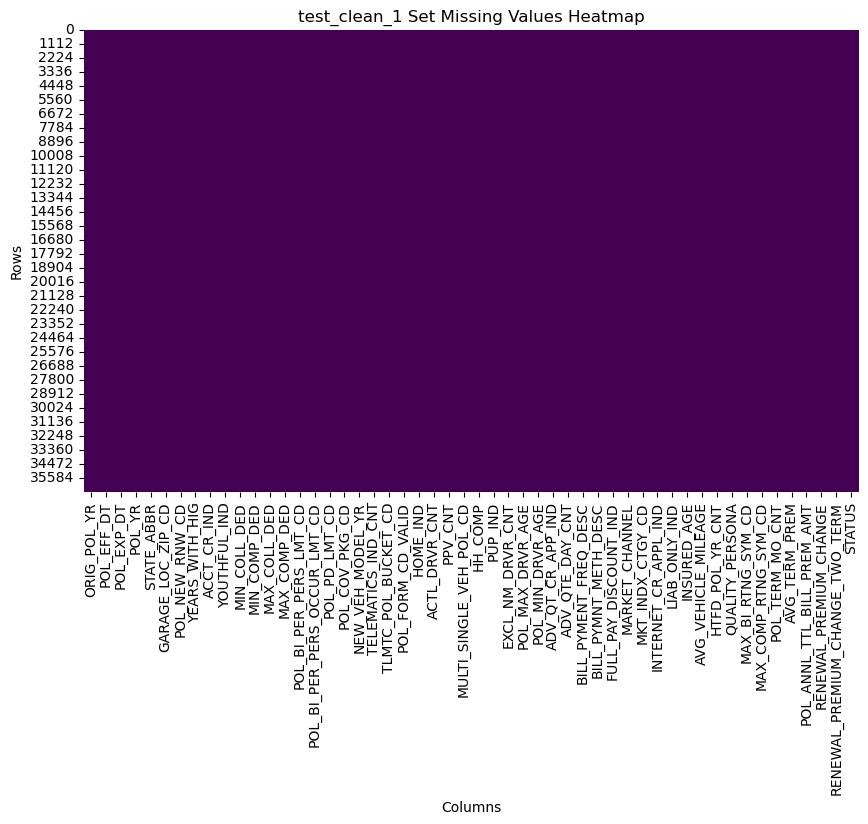

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
missing_test_clean_1 = test_clean_1.isnull()
plt.figure(figsize=(10, 6))
sns.heatmap(missing_test_clean_1, cmap='viridis', cbar=False)
plt.title('test_clean_1 Set Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [57]:
train_clean_1.to_csv('cleaned_train.csv', index=False)

In [58]:
#Swap out for holdout/test depending on what is being cleaned
test_clean_1.to_csv('cleaned_holdout.csv', index=False)